# EcoFOCIpy ADCP QC - 20BSP-14A

- mostly remove >100 cm/s flows in u/v


In [28]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [29]:
file_in = '20bsp14a_0031m.nc'
xdf = xa.load_dataset(file_in)

In [30]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 34591, depth: 20)
Coordinates:
  * time             (time) datetime64[ns] 2020-09-18T08:00:00 ... 2022-09-08...
  * depth            (depth) float64 -10.0 -8.0 -6.0 -4.0 ... 24.0 26.0 28.0
  * latitude         (latitude) float64 64.0
  * longitude        (longitude) float64 -167.9
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 -6.515 ... 0....
    v_curr_comp      (latitude, longitude, time, depth) float64 -13.85 ... 15.09
    w_curr_comp      (latitude, longitude, time, depth) float64 8.9 7.1 ... -0.1
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -3.6 0.0 ... 0.4
    agc1             (latitude, longitude, time, depth) float64 68.0 ... 80.0
    agc2             (latitude, longitude, time, depth) float64 76.0 ... 76.0
    agc3             (latitude, longitude, time, depth) float64 72.0 ... 86.0
    agc4             (latitude, longitude, time, depth) float64 70.0 ... 69.0
Attributes: (12/13)
    Latitude_DegMMddW:                      64 00.156 N
    Longitude_DegMMddN:                     167 56.043 W
    MooringID:                              20BSP-14A
    platform_deployment_date:               2020-09-18T07:37:00Z
    platform_deployment_cruise_name:        DY2012
    platform_recovery_date:                 2022-09-08T23:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             38.1
    date_created:                           2022-11-21T09:47:13Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [31]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

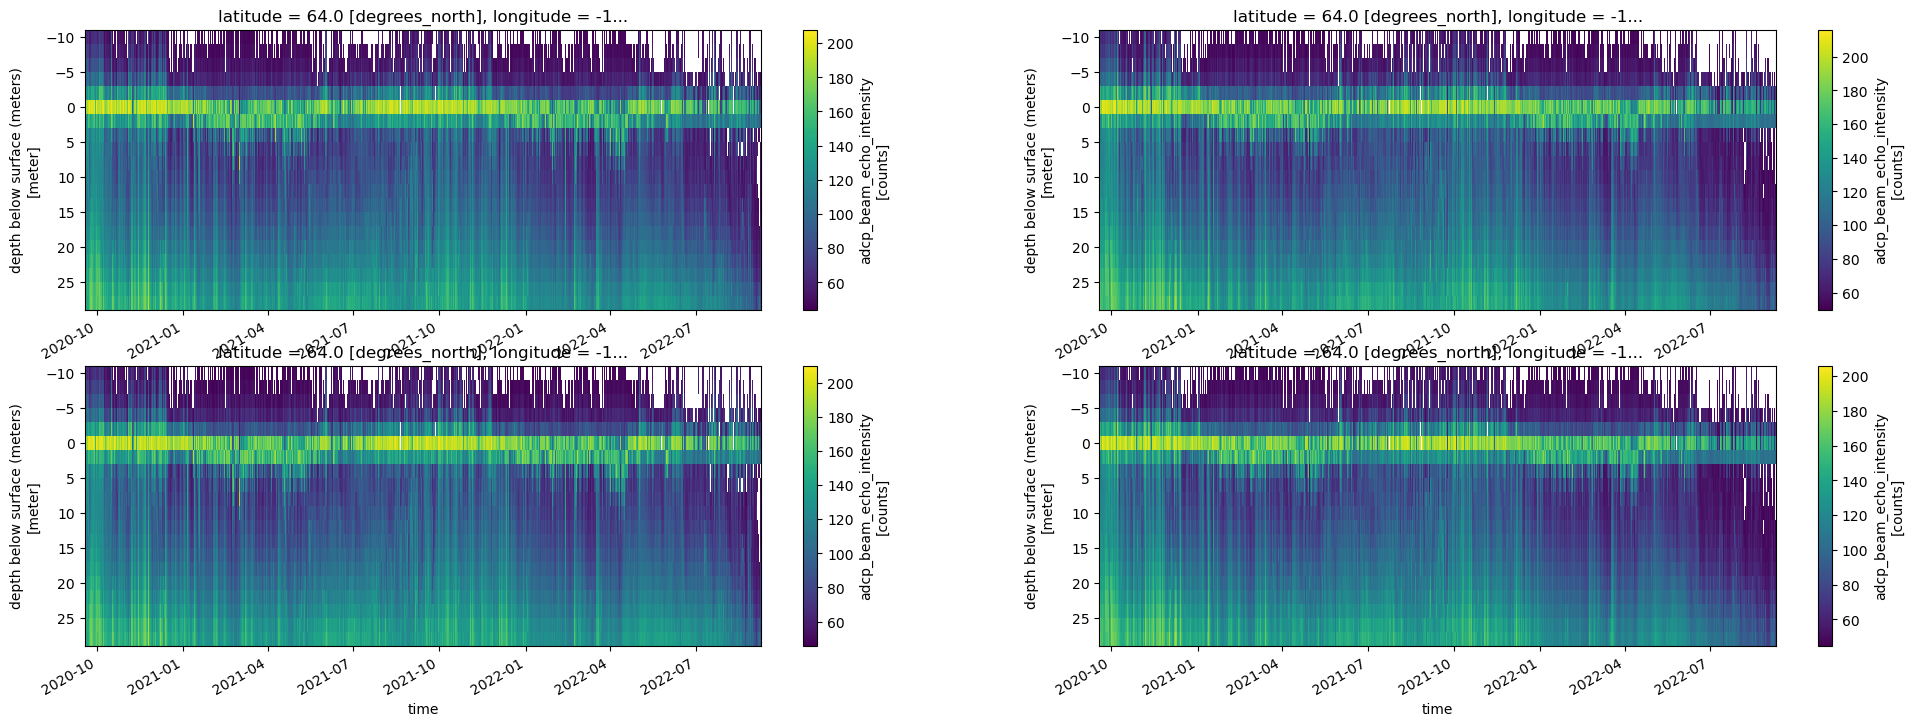

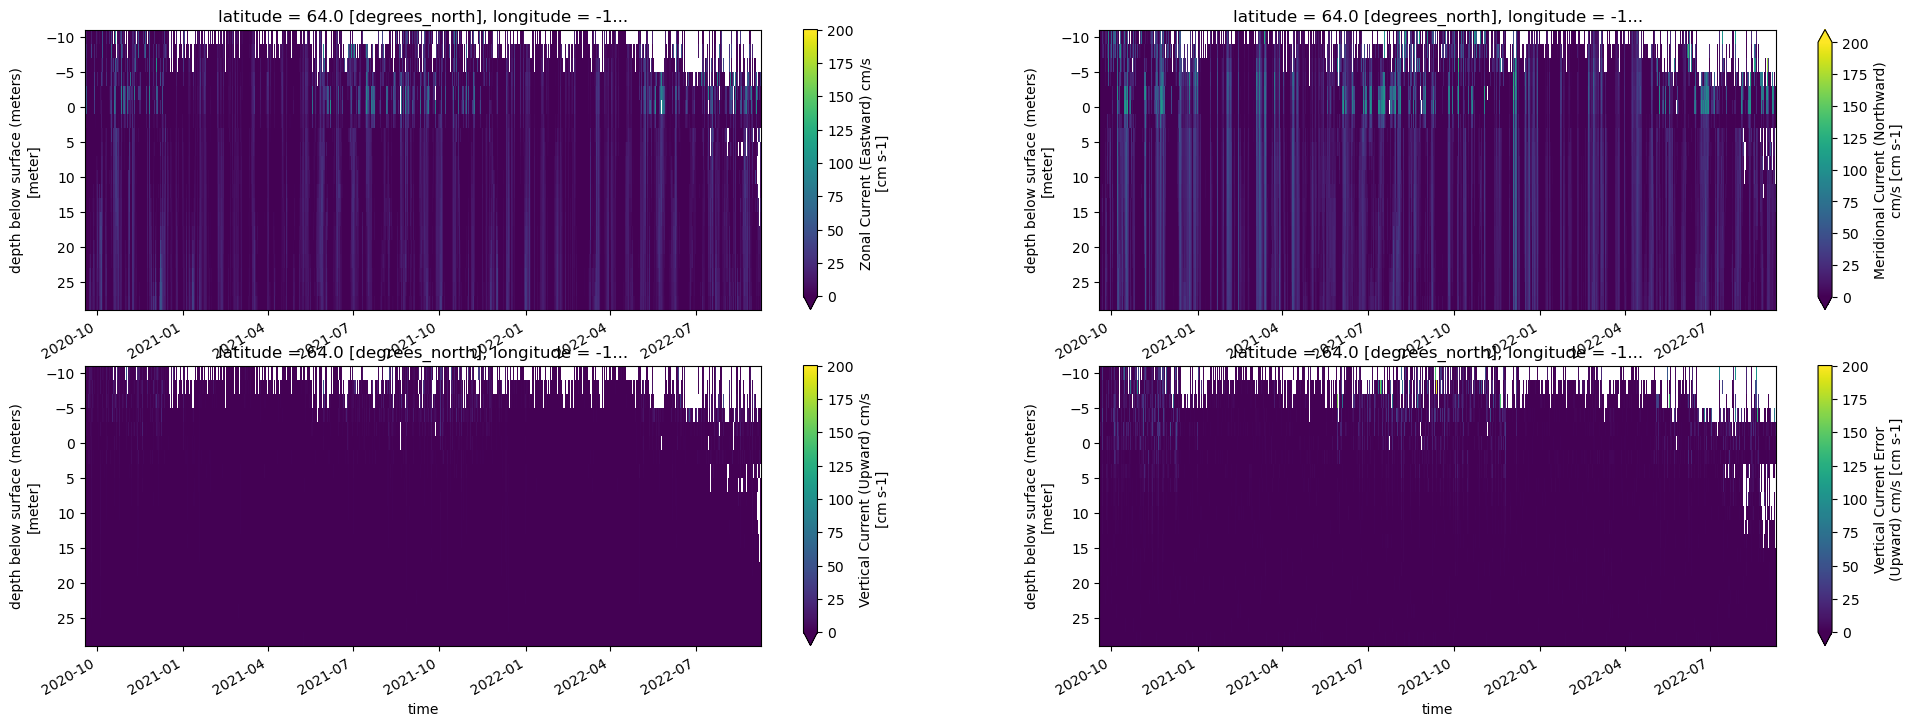

In [32]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [33]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [34]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [35]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [36]:
ixdf.to_netcdf(file_in.replace('.nc','.trimmed.nc'))

In [37]:
xdf = xa.load_dataset(file_in.replace('.nc','.trimmed.nc'))

In [38]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [39]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

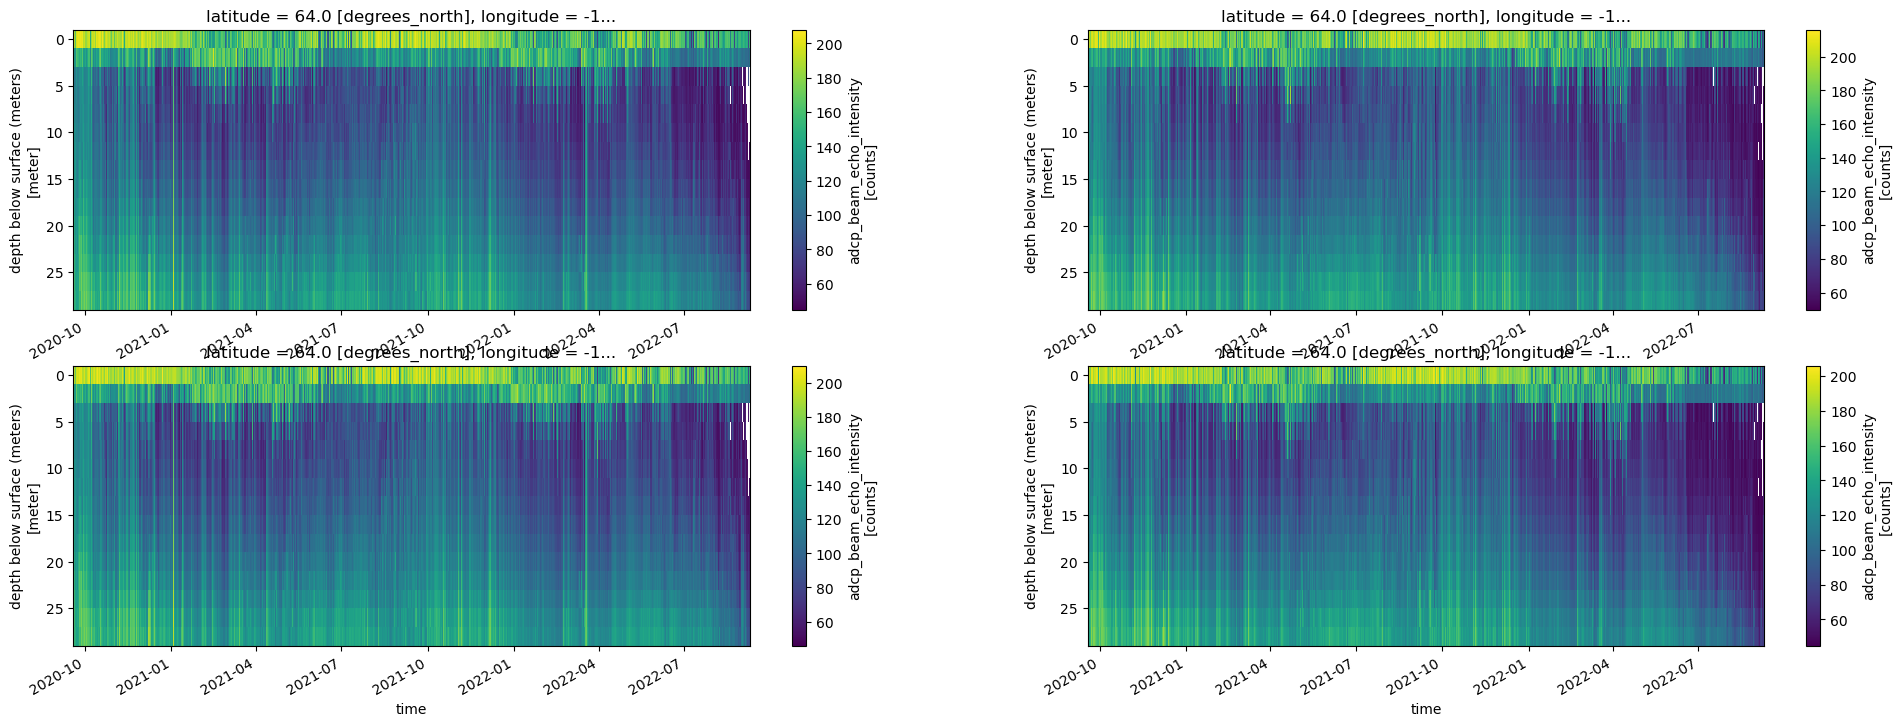

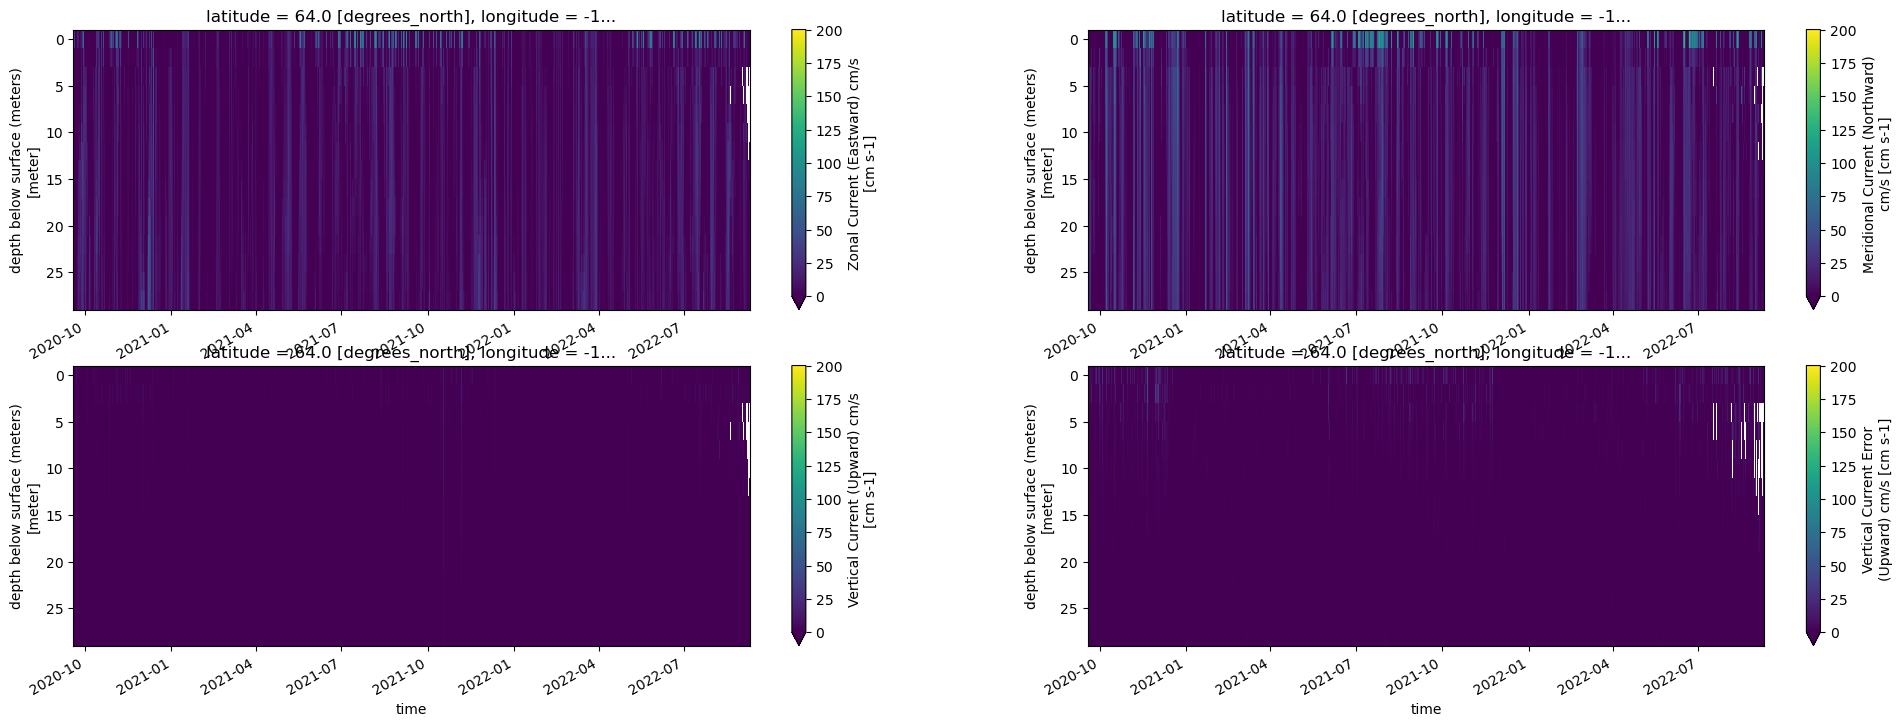

In [40]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [41]:
ixdf.to_netcdf(file_in.replace('.nc','.filtered.nc'))